#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 4 - Redes neuronales multicapa

A continuación la clase de la red neuronal de una capa (que se explicó en clase)

In [6]:
"""
Multilayer Perceptron
Dr. Carlos Villaseñor
"""

# Packages
import numpy as np
import pandas as pd

def linear(z, derivative=False):
    a = z
    if derivative:
        da = 1
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1/(1+np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

class MLP:

    def __init__(self, layers_dims,
                 hidden_activation=relu,
                 output_activation=sigmoid,
                 learning_rate=0.1):

        # Instance Attributes
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        self.layers = layers_dims
        self.eta = learning_rate

        # Initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l-1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)

            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation


    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a

    def fit(self, X, Y, epochs=100):

        # Number of samples
        P = X.shape[1]

        #Gradient Descent
        for _ in range(epochs):
            for p in range(P):

                # Initialize activations and their derivatives
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)

                # Propagation
                a[0] = X[:, p].reshape(self.layers[0], 1)
                for l in range(1, self.L + 1):
                    z = self.w[l] @ a[l-1]  + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)

                # Backpropagation
                for l in range(self.L, 0, -1):
                    # Calculate local gradient (lg)
                    if l == self.L:
                        lg[l] = (Y[:, p] - a[l]) * da[l]
                    else:
                        lg[l] = self.w[l + 1].T @ lg[l+1] * da[l]

                # Update parameters
                for l in range(1, self.L + 1):
                    self.w[l] += self.eta * lg[l] @ a[l - 1].T
                    self.b[l] += self.eta * lg[l]

Para su actividad necesitarán esta función para dibujar

In [7]:
import matplotlib.pyplot as plt


def MLP_binary_classification_2d(X, Y, net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0, i] == 0:
            plt.plot(X[0, i], X[1, i], '.r')
        else:
            plt.plot(X[0, i], X[1, i], '.b')
    xmin, ymin = np.min(X[0, :]) - 0.5, np.min(X[1, :]) - 0.5
    xmax, ymax = np.max(X[0, :]) + 0.5, np.max(X[1, :]) + 0.5
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                         np.linspace(ymin, ymax, 100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.8,
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.grid()
    plt.show()

Vamos a crear el dataset para el problema de las medias lunas

In [8]:
df = pd.read_csv('./DataSets/moons.csv')
X = np.asanyarray(df.drop(columns=['y'])).T
Y = np.asanyarray(df[['y']]).T
print(X.shape)
print(Y.shape)

# n, p = X.shape
# for i in range(n):
#     X[i, :] = (X[i, :] - X[i, :].min()) / (X[i, :].max() - X[i, :].min())

(2, 1000)
(1, 1000)


Dibujemos primeramente que nos da la red neuronal sin entrenar

[[0.89369265 0.58969989 0.6385109  0.66550305 0.67856493 0.66737353
  0.5591814  0.2993931  0.15349569 0.68470327 0.88986647 0.1133558
  0.11008257 0.14082874 0.85739976 0.9352176  0.29144342 0.60998424
  0.18237609 0.14544573 0.70101927 0.23427076 0.86325439 0.561138
  0.92245211 0.71311432 0.59911744 0.4646604  0.51666031 0.89016188
  0.10167241 0.09305116 0.83170474 0.74918354 0.91482611 0.1294244
  0.41089422 0.90274705 0.69191623 0.62227295 0.87725595 0.09247764
  0.4739987  0.47505058 0.57373631 0.14178202 0.82706861 0.91056948
  0.26465814 0.88615865 0.48663073 0.45898415 0.50691473 0.93327692
  0.50673592 0.779111   0.58922121 0.77536715 0.91609124 0.86048539
  0.73189553 0.82998435 0.15435997 0.54033578 0.24808932 0.91211767
  0.90049599 0.44122112 0.77892306 0.44777849 0.51412344 0.90599488
  0.75755321 0.89456707 0.76066216 0.91515209 0.25026261 0.43540949
  0.84037135 0.7451859  0.17844912 0.7405632  0.21703525 0.20320321
  0.60169121 0.1290932  0.23931137 0.24050746 0.9177

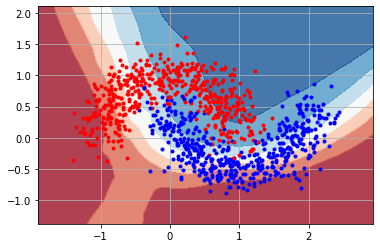

In [9]:
net = MLP((2, 100, 1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X, Y, net)

Ahora vamos a entrenar!!

[[3.43551071e-02 9.99999604e-01 9.99900384e-01 9.98378512e-01
  9.99197860e-01 6.14326175e-01 9.99955762e-01 2.64777473e-06
  9.99999973e-01 6.16608656e-04 5.05449181e-02 4.33820124e-08
  1.93526915e-07 9.99962681e-01 5.60653762e-01 4.74626763e-03
  9.02693732e-06 9.99999996e-01 4.30238213e-09 9.99519370e-01
  9.69005443e-12 5.48036798e-03 2.92638268e-02 1.39204770e-05
  2.34801842e-03 9.99999972e-01 9.13840599e-01 9.97792492e-01
  9.98140164e-01 2.02514981e-02 6.44050797e-08 4.85812422e-10
  5.51738747e-01 7.59441822e-04 7.63623288e-04 9.99880417e-01
  9.99999998e-01 1.50328979e-02 9.99105792e-01 9.99999677e-01
  1.84842191e-01 1.21122005e-08 9.99979092e-01 9.75932165e-01
  8.31546872e-05 9.99564096e-01 8.93398175e-01 9.30159555e-03
  1.18594600e-05 7.19879378e-02 9.99875680e-01 9.66073472e-01
  9.98143083e-01 6.32765780e-03 9.99972819e-01 4.18127686e-01
  1.00000000e+00 8.37696273e-01 4.83117102e-03 1.71024280e-03
  1.55459136e-08 9.98478573e-01 4.49570746e-06 9.99993711e-01
  9.9999

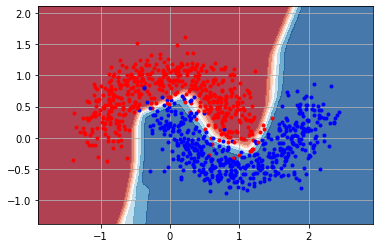

In [10]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X, Y, net)